<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250 style="padding: 10px"> 
<br><b>CET Template Notebook</b> <br>
Contact author(s): <i>Author Name</i> <br>
Last verified to run: <i>yyyy-mm-dd</i> <br>
LSST Science Pipelines version: Weekly <i>yyyy_xx</i> <br>
Container Size: <i>medium</i> <br>
Targeted learning level: <i>beginner</i> <br>

_In this template, text in italics are examples or instructions that should be: (a) removed if it is not applicable to the notebook; or (b) replaced with text that is appropriate for the notebook. But bold or regular text should appear pretty much as-is in all CET notebooks. For more information, see the [CET's Guidelines for Tutorial Notebooks](https://confluence.lsstcorp.org/pages/viewpage.action?pageId=168857070)._

_While developing, use the following code cell to check that the code conforms to standards, but then delete the cell and "Kernel --> Restart Kernel and Clear All Outputs" before saving and committing._

In [ ]:
%load_ext pycodestyle_magic
%flake8_on
import logging
logging.getLogger("flake8").setLevel(logging.FATAL)

_The six cells below are considered the extended header of the notebook. The first four will be used, verbatim, to create the table of notebook metadata in the README.md file for the repository._

**Description:** _Very brief description of notebook._

**Skills:** _Brief list of skills to match the README.md file for the repository._

**LSST Data Products:** _List the all of the types of LSST catalogs and images used._

**Packages:** _List the python packages used._ (_List the packages being taught first, e.g., afwDisplay for a notebook about displaying images. Then supporting packages, e.g., lsst.daf.butler for a notebook about displaying images. It is OK to leave out basic support packages like os or glob.)_

**Credit:**
_E.g., "Originally developed by" or "Based on notebooks developed by" and then people's names, including journal article or software release citations if appropriate._
Please consider acknowledging them if this notebook is used for the preparation of journal articles, software releases, or other notebooks.

**Get Support:**
Find DP0-related documentation and resources at <a href="https://dp0-2.lsst.io">dp0-2.lsst.io</a>. Questions are welcome as new topics in the <a href="https://community.lsst.org/c/support/dp0">Support - Data Preview 0 Category</a> of the Rubin Community Forum. Rubin staff will respond to all questions posted there.

## 1. Introduction

_Provide a light narrative about this notebook, e.g., "This notebook will teach the user..."._

_Cite or link to any external information or documentation, and cross-reference to other notebooks._

### 1.1 Package Imports

_All package imports should be done in the first code cell._

_Provide explanation or external links to package documentation, where appropriate._

_E.g., Numpy is a fundamental package for scientific computing with arrays in Python (<a href="https://numpy.org">numpy.org</a>)._

_Use code cell comments to describe the packages being imported._

In [1]:
# general python packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')
import pandas as pd

# LSST package for TAP queries
from lsst.rsp import get_tap_service, retrieve_query

# LSST package for Butler queries
import lsst.daf.butler as dafButler

# LSST package for image display
import lsst.afw.display as afwDisplay

### 1.2 Define Functions and Parameters

_If your notebook defines functions or parameters to use later or throughout, do it here in sub-section 1.2._

_It is OK to rename the subsection to be more specific to the notebook, and/or to use sub-sub-sections like "1.2.1 Define global cosmological parameter values" or "1.2.2 Define a function to make an image cutout"._

_It is OK to remove this sub-section if it is not being used._

## 2. Section Heading

_Use numbers for sections, sub-sections, and sub-sub-sections to enable referencing, e.g., "I'm having trouble with the second code cell in Section 2.3."_

_Use section titles that actively describe what is being done, e.g., "Create a color-magnitude diagram" instead of "Plot", so that the auto-generated table of contents is easy to navigate._

### 2.1 Section Sub-heading

#### 2.1.1 Section Sub-sub-heading

#### Define a function to convert a given perihelion distance (q) and eccentricity (e) to an orbital semi-major axis (a). Their relationship is defined by 𝑞=𝑎(1−𝑒).

In [2]:
def calc_semimajor_axis(q, e):
    """
    Given a perihelion distance and orbital eccentricity,
    calculate the semi-major axis of the orbit.

    Parameters
    ----------
    q: ndarray
        Distance at perihelion, in au.
    e: ndarray
        Orbital eccentricity.

    Returns
    -------
    a: ndarray
        Semi-major axis of the orbit, in au.
        q = a(1-e), so a = q/(1-e)
    """

    return q / (1.0 - e)

Define a function to convert a given perihelion distance (q) and eccentricity (e) to an orbital semi-major axis (a) and then aphelion distance (Q). Their relationships are defined by: $𝑞=𝑎(1−𝑒)$ and $Q=𝑎(1−𝑒)$.

In [3]:
def calc_aphelion(q, e):
    """
    Given a perihelion distance and orbital eccentricity,
    calculate the semi-major axis of the orbit.

    Parameters
    ----------
    q: ndarray
        Distance at perihelion, in au.
    e: ndarray
        Orbital eccentricity.
    a: ndarray
        Semi-major axis of the orbit, in au.
        q = a(1-e), so a = q/(1-e)

    Returns
    -------
    Q: ndarray
        Distance at aphelion, in au.
        Q = a(1+e)
    """
    
    a = q / (1.0 - e)

    return a * (1.0 + e)

### 2.1 Create the Rubin TAP Service Client

#### Get an instance of the TAP service, and assert that it exists.

In [4]:
service = get_tap_service("ssotap")
assert service is not None

#### Use the TAP service to query for the column information from MPCORB.

#### Print the results as a pandas table.

In [5]:
results = service.search("SELECT column_name, datatype, description, "
                         "       unit from TAP_SCHEMA.columns "
                         "WHERE table_name = 'dp03_catalogs_10yr.MPCORB'")
results.to_table().to_pandas()

,column_name,datatype,description,unit
0,arc,float,"MPCORB: Arc (days), for single-opposition objects",d
1,arcEnd,char,MPCORB: Year of last observation (for multi-op...,
2,arcStart,char,MPCORB: Year of first observation (for multi-o...,
3,computer,char,MPCORB: Computer name,
4,e,double,MPCORB: Orbital eccentricity,
5,epoch,double,"MPCORB: Epoch (in MJD, .0 TT)",d
6,flags,int,MPCORB: 4-hexdigit flags. See https://minorpla...,
7,fullDesignation,char,MPCORB: Readable designation,
8,incl,double,"MPCORB: Inclination to the ecliptic, J2000.0 (...",deg
9,lastIncludedObservation,float,MPCORB: Date of last observation included in o...,d


#### Limit the query to select sources with perihelion distances of less than 1.3 au and semimajor axis distances of less than 4 au (in the MPCORB table, q < 1.3, a < 4.0) to get only the near-Earth objects.

#### Define the table returned by this query as "unique" since it contains the IDs of unique solar system objects.

In [6]:
q_select = '1.3'
e_select = '1.0'

In [7]:
query = """
SELECT
    mpc.ssObjectId, mpc.mpcDesignation, mpc.mpcNumber,
    mpc.mpcH, mpc.e, mpc.q, mpc.incl, mpc.n,
    sso.arc, sso.numObs
FROM
    dp03_catalogs_10yr.MPCORB as mpc
INNER JOIN dp03_catalogs_10yr.SSObject as sso
ON mpc.ssObjectId = sso.ssObjectId
WHERE mpc.q < {} AND mpc.e < {} ORDER by sso.ssObjectId
""".format(q_select, e_select)

uniqueObj = service.search(query).to_table().to_pandas()
uniqueObj

,ssObjectId,mpcDesignation,mpcNumber,mpcH,e,q,incl,n,arc,numObs
0,-9222952578217572358,S00016lN,0,24.938999,0.323057,0.965337,3.400028,NaN,694.036560,33
1,-9222820784385736130,S0000vOM,0,23.990000,0.684607,0.707910,4.622397,NaN,2666.048340,13
2,-9222809672762914664,S00014Xa,0,24.913000,0.640382,0.918229,9.281930,NaN,1409.165649,29
3,-9222638543944259679,S00005CY,0,21.841000,0.276749,1.183802,62.506580,NaN,5.920290,7
4,-9222469573562197566,2015 RK3,0,19.889999,0.484066,1.148714,37.496930,NaN,2720.101074,46
...,...,...,...,...,...,...,...,...,...,...
39957,9221626825731835023,S0000glx,0,23.164000,0.440282,0.953206,11.700498,NaN,701.022156,14
39958,9222267589414335277,S000020f,0,20.559000,0.189554,1.141825,2.299695,NaN,3499.325195,187
39959,9222476822316093977,S00003q1,0,21.222000,0.758657,0.403145,1.308985,NaN,779.685608,35
39960,9222765823057774610,S0000ywa,0,24.091000,0.726711,0.458780,48.804468,NaN,2244.866455,32


In [8]:
a = calc_semimajor_axis(uniqueObj['q'], uniqueObj['e'])
uniqueObj['a'] = a

In [9]:
Q = calc_aphelion(uniqueObj['q'], uniqueObj['e'])
uniqueObj['Q'] = Q

### Compute the values needed to plot the curves denoting Earth-crossing space

#### First define a function to compute the values needed for the curve showing an aphelion at a planet's perihelion distance

In [10]:
def get_aphelion_at_planets_perihelion_curve_values(q_planet):
    
    a_Q = np.arange(0.001, q_planet, 0.001)
    e_Q = (q_planet / a_Q) - 1.0
        
    return (a_Q, e_Q)

#### Next define a function to compute the values needed for the curve showing a perihelion at planet's aphelion distance

In [11]:
def get_perihelion_at_planets_aphelion_curve_values(Q_planet):
        
    a_q = np.arange(Q_planet, 4.0, 0.001)
    e_q = (1.0 - (Q_planet / a_q))

    return (a_q, e_q)

#### Define planetary perihelia and aphelia and perihelion boundary for NEOs

In [12]:
q_Earth = 0.983
Q_Earth = 1.017

q_Mercury = 0.307
Q_Mercury = 0.467

q_Venus = 0.718
Q_Venus = 0.728

q_Mars = 1.381
Q_Mars = 1.666

q_NEOs = 1.3

#### Get the Earth-crossing curve values and the NEO region boundary curve values

In [13]:
a_Q_Earth, e_Q_Earth = get_aphelion_at_planets_perihelion_curve_values(q_Earth)

a_q_Earth, e_q_Earth = get_perihelion_at_planets_aphelion_curve_values(Q_Earth)

a_q_NEO, e_q_NEO = get_perihelion_at_planets_aphelion_curve_values(q_NEOs)

#### Plot the two Earth-crossing curves and label NEO class regions

Text(0.5, 1.0, 'NEO Class Boundaries')

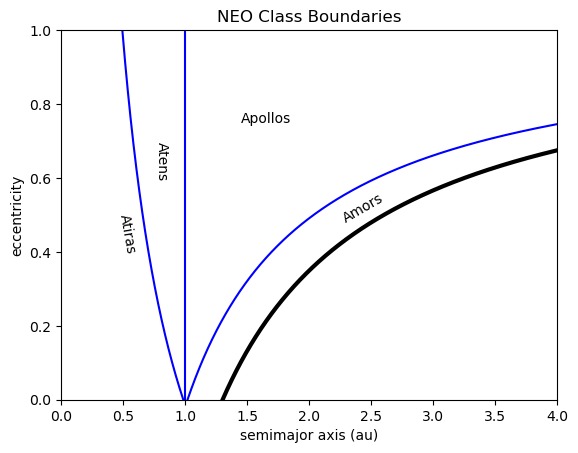

In [14]:
fig, ax = plt.subplots()
plt.xlim([0.,4.])
plt.ylim([0.,1.])
ax.axvline(x=1.0, color="blue")
ax.plot(a_Q_Earth, e_Q_Earth, "blue")
ax.plot(a_q_Earth, e_q_Earth, "blue")
ax.plot(a_q_NEO, e_q_NEO, "black", linewidth=3)
ax.annotate('Amors', xy=(2.25, 0.48), xytext=(2.25, 0.48), rotation=30.0)
ax.annotate('Apollos', xy=(1.45, 0.75), xytext=(1.45, 0.75))
ax.annotate('Atens', xy=(0.75, 0.6), xytext=(0.75, 0.6), rotation=270.0)
ax.annotate('Atiras', xy=(0.45, 0.4), xytext=(0.45, 0.4), rotation=280.0)
plt.xlabel("semimajor axis (au)")
plt.ylabel("eccentricity")
plt.title("NEO Class Boundaries")

#### Determine the percentage of NEOs in each class (Amors, Apollos, Atens, & Atiras)

In [15]:
Amors_pop = (uniqueObj.q < q_NEOs) & (uniqueObj.q > Q_Earth) & (uniqueObj.a < 4.0) & (uniqueObj.e < 1.0)
Amors_pop_df = uniqueObj[Amors_pop][['mpcDesignation', 'q', 'Q', 'a', 'e', 'incl', 'mpcH']]

Apollos_pop = (uniqueObj.q < Q_Earth) & (uniqueObj.a > 1.0) & (uniqueObj.a < 4.0) & (uniqueObj.e < 1.0)
Apollos_pop_df = uniqueObj[Apollos_pop][['mpcDesignation', 'q', 'Q', 'a', 'e', 'incl', 'mpcH']]

Atens_pop = (uniqueObj.Q > q_Earth) & (uniqueObj.a < 1.0) & (uniqueObj.e < 1.0)
Atens_pop_df = uniqueObj[Atens_pop][['mpcDesignation', 'q', 'Q', 'a', 'e', 'incl', 'mpcH']]

Atiras_pop = (uniqueObj.Q < q_Earth) & (uniqueObj.a < 4.0) & (uniqueObj.e < 1.0)
Atiras_pop_df = uniqueObj[Atiras_pop][['mpcDesignation', 'q', 'Q', 'a', 'e', 'incl', 'mpcH']]

total_NEOs = len(Amors_pop_df) + len(Apollos_pop_df) + len(Atens_pop_df) + len(Atiras_pop_df)

perc_Amors = len(Amors_pop_df) / total_NEOs * 100.
perc_Apollos = len(Apollos_pop_df) / total_NEOs * 100.
perc_Atens = len(Atens_pop_df) / total_NEOs * 100.
perc_Atiras = len(Atiras_pop_df) / total_NEOs * 100.

print("Fraction of NEOs that are Amors: ", "%4.1f" % (perc_Amors), "%")
print("Fraction of NEOs that are Apollos: ", "%4.1f" % (perc_Apollos), "%")
print("Fraction of NEOs that are Atens: ", "%4.1f" % (perc_Atens), "%")
print("Fraction of NEOs that are Atiras: ", "%4.1f" % (perc_Atiras), "%")

Fraction of NEOs that are Amors:  38.2 %
Fraction of NEOs that are Apollos:  55.3 %
Fraction of NEOs that are Atens:   6.5 %
Fraction of NEOs that are Atiras:   0.1 %


Amors = []
for i in range(len(uniqueObj["q"].data)):
    if ((uniqueObj["q"].data[i]<q_NEOs) and (uniqueObj["q"].data[i]>Q_Earth) and (uniqueObj["a"].data[i]<4.0) and (uniqueObj["e"].data[i]<1.0)):
        Amors.append([uniqueObj["mpcDesignation"][i],uniqueObj["q"][i],uniqueObj["Q"][i],uniqueObj["a"][i],uniqueObj["e"][i],uniqueObj["incl"][i]])
#print(len(Amors))
#print(Amors)
Amors_df = pd.DataFrame(Amors, columns=['mpcDesignation', 'q', 'Q', 'a', 'e', 'incl'])
#print(Amors_df)

Apollos = []
for i in range(len(uniqueObj["q"].data)):
    if ((uniqueObj["q"].data[i]<Q_Earth) and (uniqueObj["a"].data[i]>1.0) and (uniqueObj["a"].data[i]<4.0) and (uniqueObj["e"].data[i]<1.0)):
        Apollos.append([uniqueObj["mpcDesignation"].data[i],uniqueObj["q"].data[i],uniqueObj["Q"].data[i],uniqueObj["a"].data[i],uniqueObj["e"].data[i],uniqueObj["incl"].data[i]])
#print(len(Apollos))
#print(Apollos)
Apollos_df = pd.DataFrame(Apollos, columns=['mpcDesignation', 'q', 'Q', 'a', 'e', 'incl'])
#print(Apollos_df)

Atens = []
for i in range(len(uniqueObj["q"].data)):
    if ((uniqueObj["Q"].data[i]>q_Earth) and (uniqueObj["a"].data[i]<1.0) and (uniqueObj["a"].data[i]<4.0) and (uniqueObj["e"].data[i]<1.0)):
        Atens.append([uniqueObj["mpcDesignation"].data[i],uniqueObj["q"].data[i],uniqueObj["Q"].data[i],uniqueObj["a"].data[i],uniqueObj["e"].data[i],uniqueObj["incl"].data[i]])
#print(len(Atens))
#print(Atens)
Atens_df = pd.DataFrame(Atens, columns=['mpcDesignation', 'q', 'Q', 'a', 'e', 'incl'])
#print(Atens_df)

Atiras = []
for i in range(len(uniqueObj["q"].data)):
    if ((uniqueObj["Q"].data[i]<q_Earth) and (uniqueObj["a"].data[i]<4.0) and (uniqueObj["e"].data[i]<1.0)):
        Atiras.append([uniqueObj["mpcDesignation"].data[i],uniqueObj["q"].data[i],uniqueObj["Q"].data[i],uniqueObj["a"].data[i],uniqueObj["e"].data[i],uniqueObj["incl"].data[i]])
#print(len(Atiras))
#print(Atiras)
Atiras_df = pd.DataFrame(Atiras, columns=['mpcDesignation', 'q', 'Q', 'a', 'e', 'incl'])
#print(Atiras_df)

total_NEOs = len(Amors) + len(Apollos) + len(Atens) + len(Atiras)
#print(total_NEOs)
#print(len(uniqueObj))

perc_Amors = len(Amors) / total_NEOs * 100.
perc_Apollos = len(Apollos) / total_NEOs * 100.
perc_Atens = len(Atens) / total_NEOs * 100.
perc_Atiras = len(Atiras) / total_NEOs * 100.

print("Fraction of NEOs that are Amors: ", "%4.1f" % (perc_Amors), "%")
print("Fraction of NEOs that are Apollos: ", "%4.1f" % (perc_Apollos), "%")
print("Fraction of NEOs that are Atens: ", "%4.1f" % (perc_Atens), "%")
print("Fraction of NEOs that are Atiras: ", "%4.1f" % (perc_Atiras), "%")

Text(0.5, 1.0, 'NEOs in DP0.3')

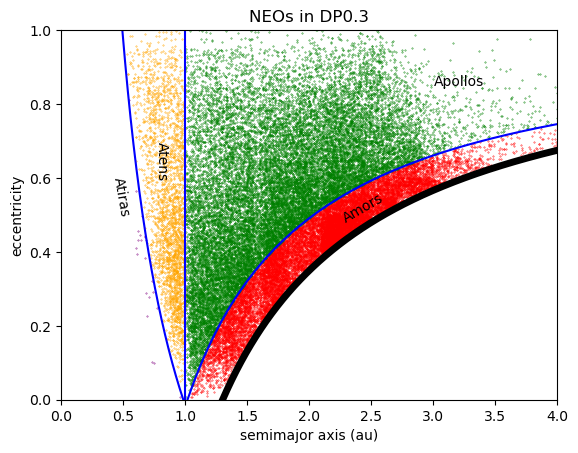

In [16]:
fig, ax = plt.subplots()
plt.xlim([0.,4.])
plt.ylim([0.,1.])
ax.scatter(Amors_pop_df.a, Amors_pop_df.e, s=0.1, color='red')
ax.scatter(Apollos_pop_df.a, Apollos_pop_df.e, s=0.1, color='green')
ax.scatter(Atens_pop_df.a, Atens_pop_df.e, s=0.1, color='orange')
ax.scatter(Atiras_pop_df.a, Atiras_pop_df.e, s=0.1, color='purple')
ax.plot(a_Q_Earth, e_Q_Earth, "blue")
ax.plot(a_q_Earth, e_q_Earth, "blue")
ax.axvline(x=1.0, color="blue")
ax.plot(a_q_NEO, e_q_NEO, "black", linewidth=5)
ax.annotate('Amors', xy=(2.25, 0.48), xytext=(2.25, 0.48), rotation=30.0)
ax.annotate('Apollos', xy=(3.0, 0.85), xytext=(3.0, 0.85))
ax.annotate('Atens', xy=(0.75, 0.6), xytext=(0.75, 0.6), rotation=270.0)
ax.annotate('Atiras', xy=(0.4, 0.5), xytext=(0.4, 0.5), rotation=280.0)
plt.xlabel("semimajor axis (au)")
plt.ylabel("eccentricity")
plt.title("NEOs in DP0.3")

#### Get the planet-crossing curve values for all the terrestrial planets

In [17]:
a_Q_Mercury, e_Q_Mercury = get_aphelion_at_planets_perihelion_curve_values(q_Mercury)
a_q_Mercury, e_q_Mercury = get_perihelion_at_planets_aphelion_curve_values(Q_Mercury)

a_Q_Venus, e_Q_Venus = get_aphelion_at_planets_perihelion_curve_values(q_Venus)
a_q_Venus, e_q_Venus = get_perihelion_at_planets_aphelion_curve_values(Q_Venus)

a_Q_Earth, e_Q_Earth = get_aphelion_at_planets_perihelion_curve_values(q_Earth)
a_q_Earth, e_q_Earth = get_perihelion_at_planets_aphelion_curve_values(Q_Earth)

a_Q_Mars, e_Q_Mars = get_aphelion_at_planets_perihelion_curve_values(q_Mars)
a_q_Mars, e_q_Mars = get_perihelion_at_planets_aphelion_curve_values(Q_Mars)

Text(0.5, 1.0, 'Terrestrial Planet-Crossing Regions')

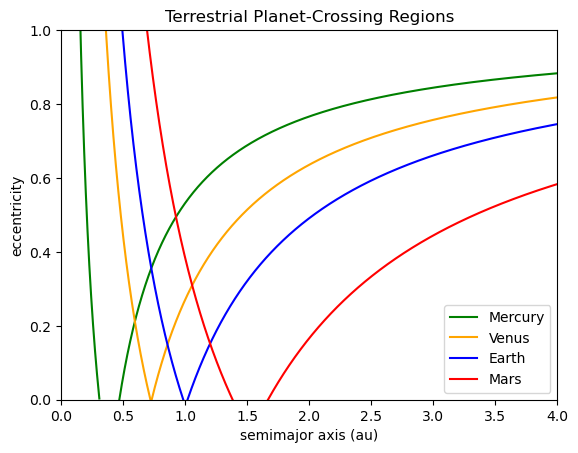

In [18]:
fig, ax = plt.subplots()
plt.xlim([0.,4.])
plt.ylim([0.,1.])
ax.plot(a_Q_Mercury, e_Q_Mercury, "green", label="Mercury")
ax.plot(a_q_Mercury, e_q_Mercury, "green")
ax.plot(a_Q_Venus, e_Q_Venus, "orange", label="Venus")
ax.plot(a_q_Venus, e_q_Venus, "orange")
ax.plot(a_Q_Earth, e_Q_Earth, "blue", label="Earth")
ax.plot(a_q_Earth, e_q_Earth, "blue")
ax.plot(a_Q_Mars, e_Q_Mars, "red", label="Mars")
ax.plot(a_q_Mars, e_q_Mars, "red")
ax.legend()
plt.xlabel("semimajor axis (au)")
plt.ylabel("eccentricity")
plt.title("Terrestrial Planet-Crossing Regions")

Text(0.5, 1.0, 'NEOs in DP0.3')

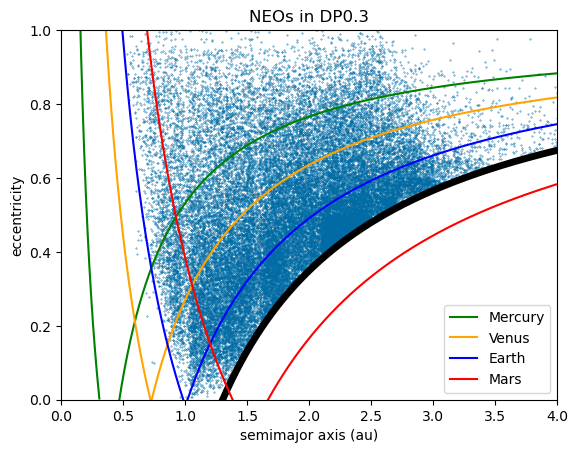

In [19]:
fig, ax = plt.subplots()
plt.xlim([0.,4.])
plt.ylim([0.,1.])
ax.scatter(uniqueObj.a, uniqueObj.e, s=0.1)
ax.plot(a_Q_Mercury, e_Q_Mercury, "green", label="Mercury")
ax.plot(a_q_Mercury, e_q_Mercury, "green")
ax.plot(a_Q_Venus, e_Q_Venus, "orange", label="Venus")
ax.plot(a_q_Venus, e_q_Venus, "orange")
ax.plot(a_Q_Earth, e_Q_Earth, "blue", label="Earth")
ax.plot(a_q_Earth, e_q_Earth, "blue")
ax.plot(a_q_NEO, e_q_NEO, "black", linewidth=5)
ax.plot(a_Q_Mars, e_Q_Mars, "red", label="Mars")
ax.plot(a_q_Mars, e_q_Mars, "red")
#ax.fill_between(a_q_Mars, e_q_Mars)
ax.legend()
plt.xlabel("semimajor axis (au)")
plt.ylabel("eccentricity")
plt.title("NEOs in DP0.3")

#### Determine the percentage of NEOs that are Earth-, Mars-, Venus-, and Mercury-crossing

In [20]:
Earth_crossing = (uniqueObj.q < Q_Earth) & (uniqueObj.Q > q_Earth) & (uniqueObj.a < 4.0) & (uniqueObj.e < 1.0)
Earth_crossing_NEOs_df = uniqueObj[Earth_crossing][['mpcDesignation', 'q', 'Q', 'a', 'e', 'incl']]

Mercury_crossing = (uniqueObj.q < Q_Mercury) & (uniqueObj.Q > q_Mercury) & (uniqueObj.a < 4.0) & (uniqueObj.e < 1.0)
Mercury_crossing_NEOs_df = uniqueObj[Mercury_crossing][['mpcDesignation', 'q', 'Q', 'a', 'e', 'incl']]

Venus_crossing = (uniqueObj.q < Q_Venus) & (uniqueObj.Q > q_Venus) & (uniqueObj.a < 4.0) & (uniqueObj.e < 1.0)
Venus_crossing_NEOs_df = uniqueObj[Venus_crossing][['mpcDesignation', 'q', 'Q', 'a', 'e', 'incl']]

Mars_crossing = (uniqueObj.q < Q_Mars) & (uniqueObj.Q > q_Mars) & (uniqueObj.a < 4.0) & (uniqueObj.e < 1.0)
Mars_crossing_NEOs_df = uniqueObj[Mars_crossing][['mpcDesignation', 'q', 'Q', 'a', 'e', 'incl']]

total_planet_crossing_NEOs = len(Earth_crossing_NEOs_df) + len(Mercury_crossing_NEOs_df) + len(Venus_crossing_NEOs_df) + len(Mars_crossing_NEOs_df)

perc_Earth_crossing_NEOs = len(Earth_crossing_NEOs_df) / total_planet_crossing_NEOs * 100.
perc_Venus_crossing_NEOs = len(Venus_crossing_NEOs_df) / total_planet_crossing_NEOs * 100.
perc_Mercury_crossing_NEOs = len(Mercury_crossing_NEOs_df) / total_planet_crossing_NEOs * 100.
perc_Mars_crossing_NEOs = len(Mars_crossing_NEOs_df) / total_planet_crossing_NEOs * 100.

print("Fraction of NEOs that are Mercury-crossing: ", "%4.1f" % (perc_Mercury_crossing_NEOs), "%")
print("Fraction of NEOs that are Venus-crossing: ", "%4.1f" % (perc_Venus_crossing_NEOs), "%")
print("Fraction of NEOs that are Earth-crossing: ", "%4.1f" % (perc_Earth_crossing_NEOs), "%")
print("Fraction of NEOs that are Mars-crossing: ", "%4.1f" % (perc_Mars_crossing_NEOs), "%")

Fraction of NEOs that are Mercury-crossing:   6.7 %
Fraction of NEOs that are Venus-crossing:  15.8 %
Fraction of NEOs that are Earth-crossing:  31.1 %
Fraction of NEOs that are Mars-crossing:  46.4 %


Earth_crossing_NEOs = []
for i in range(len(uniqueObj["q"].data)):
    if ((uniqueObj["q"].data[i]<Q_Earth) and (uniqueObj["Q"].data[i]>q_Earth) and (uniqueObj["a"].data[i]<4.0) and (uniqueObj["e"].data[i]<1.0)):
        Earth_crossing_NEOs.append([uniqueObj["mpcDesignation"].data[i],uniqueObj["q"].data[i],uniqueObj["Q"].data[i],uniqueObj["a"].data[i],uniqueObj["e"].data[i],uniqueObj["incl"].data[i]])
print(len(Earth_crossing_NEOs))
Earth_crossing_NEOs_df = pd.DataFrame(Earth_crossing_NEOs, columns=['mpcDesignation', 'q', 'Q', 'a', 'e', 'incl'])
print(len(Earth_crossing_NEOs_df))

Mercury_crossing_NEOs = []
for i in range(len(uniqueObj["q"].data)):
    if ((uniqueObj["q"].data[i]<Q_Mercury) and (uniqueObj["Q"].data[i]>q_Mercury) and (uniqueObj["a"].data[i]<4.0) and (uniqueObj["e"].data[i]<1.0)):
        Mercury_crossing_NEOs.append([uniqueObj["mpcDesignation"].data[i],uniqueObj["q"].data[i],uniqueObj["Q"].data[i],uniqueObj["a"].data[i],uniqueObj["e"].data[i],uniqueObj["incl"].data[i]])
#print(len(Mercury_crossing_NEOs))
Mercury_crossing_NEOs_df = pd.DataFrame(Mercury_crossing_NEOs, columns=['mpcDesignation', 'q', 'Q', 'a', 'e', 'incl'])

Venus_crossing_NEOs = []
for i in range(len(uniqueObj["q"].data)):
    if ((uniqueObj["q"].data[i]<Q_Venus) and (uniqueObj["Q"].data[i]>q_Venus) and (uniqueObj["a"].data[i]<4.0) and (uniqueObj["e"].data[i]<1.0)):
        Venus_crossing_NEOs.append([uniqueObj["mpcDesignation"].data[i],uniqueObj["q"].data[i],uniqueObj["Q"].data[i],uniqueObj["a"].data[i],uniqueObj["e"].data[i],uniqueObj["incl"].data[i]])
#print(len(Venus_crossing_NEOs))
Venus_crossing_NEOs_df = pd.DataFrame(Venus_crossing_NEOs, columns=['mpcDesignation', 'q', 'Q', 'a', 'e', 'incl'])

Mars_crossing_NEOs = []
for i in range(len(uniqueObj["q"].data)):
    if ((uniqueObj["q"].data[i]<Q_Mars) and (uniqueObj["Q"].data[i]>q_Mars) and (uniqueObj["a"].data[i]<4.0) and (uniqueObj["e"].data[i]<1.0)):
        Mars_crossing_NEOs.append([uniqueObj["mpcDesignation"].data[i],uniqueObj["q"].data[i],uniqueObj["Q"].data[i],uniqueObj["a"].data[i],uniqueObj["e"].data[i],uniqueObj["incl"].data[i]])
#print(len(Mars_crossing_NEOs))
Mars_crossing_NEOs_df = pd.DataFrame(Mars_crossing_NEOs, columns=['mpcDesignation', 'q', 'Q', 'a', 'e', 'incl'])

total_planet_crossing_NEOs = len(Earth_crossing_NEOs) + len(Mercury_crossing_NEOs) + len(Venus_crossing_NEOs) + len(Mars_crossing_NEOs)
#print(total_planet_crossing_NEOs)
#print(len(uniqueObj))

perc_Earth_crossing_NEOs = len(Earth_crossing_NEOs) / total_planet_crossing_NEOs * 100.
perc_Venus_crossing_NEOs = len(Venus_crossing_NEOs) / total_planet_crossing_NEOs * 100.
perc_Mercury_crossing_NEOs = len(Mercury_crossing_NEOs) / total_planet_crossing_NEOs * 100.
perc_Mars_crossing_NEOs = len(Mars_crossing_NEOs) / total_planet_crossing_NEOs * 100.

print("Fraction of NEOs that are Mercury-crossing: ", "%4.1f" % (perc_Mercury_crossing_NEOs), "%")
print("Fraction of NEOs that are Venus-crossing: ", "%4.1f" % (perc_Venus_crossing_NEOs), "%")
print("Fraction of NEOs that are Earth-crossing: ", "%4.1f" % (perc_Earth_crossing_NEOs), "%")
print("Fraction of NEOs that are Mars-crossing: ", "%4.1f" % (perc_Mars_crossing_NEOs), "%")

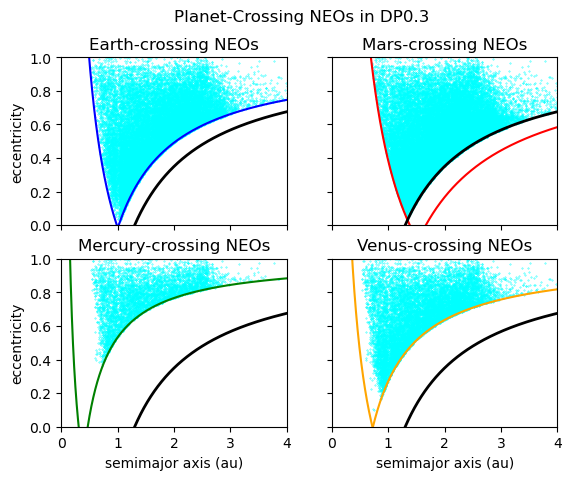

In [21]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Planet-Crossing NEOs in DP0.3')

axs[0,0].set_xlim([0.,4.])
axs[0,0].set_ylim([0.,1.])
axs[0,0].scatter(Earth_crossing_NEOs_df.a, Earth_crossing_NEOs_df.e, s=0.1, color='cyan')
axs[0,0].plot(a_Q_Earth, e_Q_Earth, "blue")
axs[0,0].plot(a_q_Earth, e_q_Earth, "blue")
axs[0,0].plot(a_q_NEO, e_q_NEO, "black", linewidth=2)
axs[0,0].set_title('Earth-crossing NEOs')

axs[0,1].set_xlim([0.,4.])
axs[0,1].set_ylim([0.,1.])
axs[0,1].scatter(Mars_crossing_NEOs_df.a, Mars_crossing_NEOs_df.e, s=0.1, color='cyan')
axs[0,1].plot(a_Q_Mars, e_Q_Mars, "red")
axs[0,1].plot(a_q_Mars, e_q_Mars, "red")
axs[0,1].plot(a_q_NEO, e_q_NEO, "black", linewidth=2)
axs[0,1].set_title('Mars-crossing NEOs')

axs[1,1].set_xlim([0.,4.])
axs[1,1].set_ylim([0.,1.])
axs[1,1].scatter(Venus_crossing_NEOs_df.a, Venus_crossing_NEOs_df.e, s=0.1, color='cyan')
axs[1,1].plot(a_Q_Venus, e_Q_Venus, "orange")
axs[1,1].plot(a_q_Venus, e_q_Venus, "orange")
axs[1,1].plot(a_q_NEO, e_q_NEO, "black", linewidth=2)
axs[1,1].set_title('Venus-crossing NEOs')

axs[1,0].set_xlim([0.,4.])
axs[1,0].set_ylim([0.,1.])
axs[1,0].scatter(Mercury_crossing_NEOs_df.a, Mercury_crossing_NEOs_df.e, s=0.1, color='cyan')
axs[1,0].plot(a_Q_Mercury, e_Q_Mercury, "green")
axs[1,0].plot(a_q_Mercury, e_q_Mercury, "green")
axs[1,0].plot(a_q_NEO, e_q_NEO, "black", linewidth=2)
axs[1,0].set_title('Mercury-crossing NEOs')

for ax in axs.flat:
    ax.set(xlabel='semimajor axis (au)', ylabel='eccentricity')
for ax in axs.flat:
    ax.label_outer()

#### Now add a plot of the semimajor axis versus inclination

Text(0, 0.5, 'eccentricity')

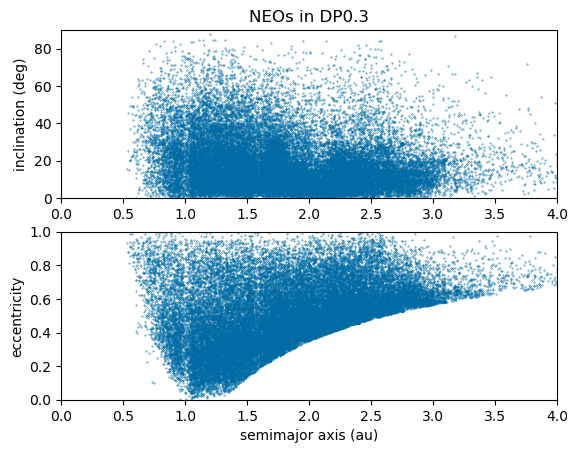

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.set_xlim([0.,4.])
ax1.set_ylim([0.,90.])
ax1.scatter(uniqueObj.a, uniqueObj.incl, s=0.1)
ax1.set_ylabel('inclination (deg)')
ax1.set_title('NEOs in DP0.3')

ax2.set_xlim([0.,4.])
ax2.set_ylim([0.,1.])
ax2.scatter(uniqueObj.a, uniqueObj.e, s=0.1)
ax2.set_xlabel('semimajor axis (au)')
ax2.set_ylabel('eccentricity')

#### Now extend the inclination range beyond 90 deg to the retrograde region

Text(0.5, 1.0, 'NEOs in DP0.3')

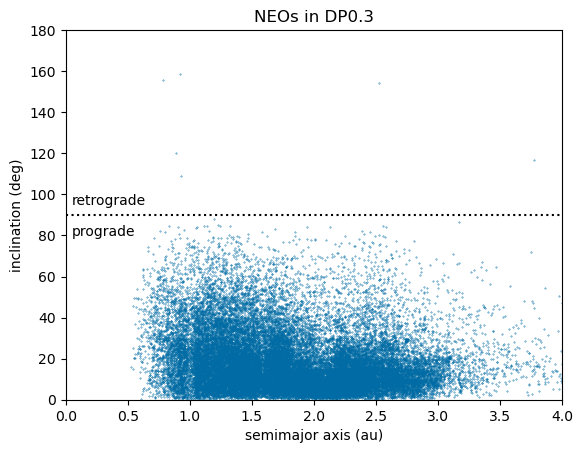

In [23]:
fig, ax = plt.subplots()
plt.xlim([0.,4.])
plt.ylim([0.,180.])
ax.scatter(uniqueObj.a, uniqueObj.incl, s=0.1)
ax.axhline(y=90.0, color="black", linestyle="dotted")
ax.annotate('prograde', xy=(0.05, 80.0), xytext=(0.05, 80.0))
ax.annotate('retrograde', xy=(0.05, 95.0), xytext=(0.05, 95.0))
plt.xlabel("semimajor axis (au)")
plt.ylabel("inclination (deg)")
plt.title("NEOs in DP0.3")

#### Pull out the retrograde (i>90 deg) NEOs and plot with their object designations

In [24]:
high_i = (uniqueObj.incl > 90.0) & (uniqueObj.q < 1.3) & (uniqueObj.a < 4.0) & (uniqueObj.e < 1.0)
high_i_df = uniqueObj[high_i][['mpcDesignation', 'q', 'a', 'e', 'incl']]
print(len(high_i_df))
print(high_i_df)

6
      mpcDesignation         q         a         e        incl
3633        iso00008  0.071941  0.919391  0.921751  158.874391
8295        iso00026  0.072821  0.924457  0.921228  109.157257
13186       iso00020  0.069097  0.786725  0.912171  155.764145
25442       iso00116  0.067106  0.887787  0.924412  119.936046
30369       LPCC1165  0.088383  3.776360  0.976596  116.977934
37588       2009 HC8  0.488301  2.526936  0.806762  154.360980


high_i = []
for i in range(len(uniqueObj.incl)):
    if ((uniqueObj["incl"].data[i]>90.0) and (uniqueObj["q"].data[i]<1.3) and (uniqueObj["a"].data[i]<4.0) and (uniqueObj["e"].data[i]<1.0)):
        high_i.append([i,uniqueObj["mpcDesignation"].data[i],uniqueObj["q"].data[i],uniqueObj["a"].data[i],uniqueObj["e"].data[i],uniqueObj["incl"].data[i]])
print(len(high_i))
print(high_i)

Text(0.5, 1.0, 'Retrograde NEOs in DP0.3')

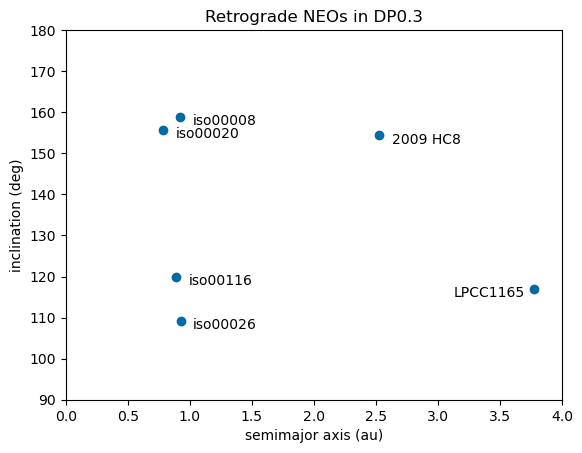

In [25]:
fig, ax = plt.subplots()
plt.xlim([0.,4.])
plt.ylim([90.,180.])
ax.scatter(high_i_df.a, high_i_df.incl)
ax.annotate(high_i_df.iloc[0].mpcDesignation, xy=(high_i_df.iloc[0].a, high_i_df.iloc[0].incl), xytext=(high_i_df.iloc[0].a+0.1, high_i_df.iloc[0].incl-2.))
ax.annotate(high_i_df.iloc[1].mpcDesignation, xy=(high_i_df.iloc[1].a, high_i_df.iloc[1].incl), xytext=(high_i_df.iloc[1].a+0.1, high_i_df.iloc[1].incl-2.))
ax.annotate(high_i_df.iloc[2].mpcDesignation, xy=(high_i_df.iloc[2].a, high_i_df.iloc[2].incl), xytext=(high_i_df.iloc[2].a+0.1, high_i_df.iloc[2].incl-2.))
ax.annotate(high_i_df.iloc[3].mpcDesignation, xy=(high_i_df.iloc[3].a, high_i_df.iloc[3].incl), xytext=(high_i_df.iloc[3].a+0.1, high_i_df.iloc[3].incl-2.))
ax.annotate(high_i_df.iloc[4].mpcDesignation, xy=(high_i_df.iloc[4].a, high_i_df.iloc[4].incl), xytext=(high_i_df.iloc[4].a-0.65, high_i_df.iloc[4].incl-2.))
ax.annotate(high_i_df.iloc[5].mpcDesignation, xy=(high_i_df.iloc[5].a, high_i_df.iloc[5].incl), xytext=(high_i_df.iloc[5].a+0.1, high_i_df.iloc[5].incl-2.))
plt.xlabel("semimajor axis (au)")
plt.ylabel("inclination (deg)")
plt.title("Retrograde NEOs in DP0.3")

fig, ax = plt.subplots()
plt.xlim([0.,4.])
plt.ylim([90.,180.])
ax.scatter(uniqueObj["a"], uniqueObj["incl"])
ax.axhline(y=90.0, color="black", linestyle="dotted")
ax.annotate(uniqueObj["mpcDesignation"].data[3633], xy=(uniqueObj["a"].data[3633], uniqueObj["incl"].data[3633]), xytext=(uniqueObj["a"].data[3633]+0.1, uniqueObj["incl"].data[3633]-2.))
ax.annotate(uniqueObj["mpcDesignation"].data[8295], xy=(uniqueObj["a"].data[8295], uniqueObj["incl"].data[8295]), xytext=(uniqueObj["a"].data[8295]+0.1, uniqueObj["incl"].data[8295]-2.))
ax.annotate(uniqueObj["mpcDesignation"].data[13186], xy=(uniqueObj["a"].data[13186], uniqueObj["incl"].data[13186]), xytext=(uniqueObj["a"].data[13186]+0.1, uniqueObj["incl"].data[13186]-2.))
ax.annotate(uniqueObj["mpcDesignation"].data[25442], xy=(uniqueObj["a"].data[25442], uniqueObj["incl"].data[25442]), xytext=(uniqueObj["a"].data[25442]+0.1, uniqueObj["incl"].data[25442]-2.))
ax.annotate(uniqueObj["mpcDesignation"].data[30369], xy=(uniqueObj["a"].data[30369], uniqueObj["incl"].data[30369]), xytext=(uniqueObj["a"].data[30369]-0.65, uniqueObj["incl"].data[30369]-2.))
ax.annotate(uniqueObj["mpcDesignation"].data[37588], xy=(uniqueObj["a"].data[37588], uniqueObj["incl"].data[37588]), xytext=(uniqueObj["a"].data[37588]+0.1, uniqueObj["incl"].data[37588]-2.))
plt.xlabel("semimajor axis (au)")
plt.ylabel("inclination (deg)")
plt.title("Retrograde NEOs in DP0.3")

## Moving on to main-belt asteroid resonances

#### Query the DP0.3 catalogs, joining the MPCORB and SSObject tables on their ssObjectId. One _could_ retrieve the entire catalog (containing millions of rows), but that query may take a long time. To minimize query time but still extract a large sample, we use a range of `ssObjectId` values.

In [26]:
q_select = '1.3'
a_min_select = '1.6'
a_max_select = '4.2'

In [27]:
uniqueObj_MBAs = service.search("SELECT mpc.ssObjectId, mpc.mpcH, mpc.e, mpc.incl, mpc.q, mpc.peri, \
                            sso.ssObjectId, sso.g_H, sso.r_H, sso.i_H, sso.z_H \
                            FROM dp03_catalogs_10yr.MPCORB as mpc \
                            JOIN dp03_catalogs_10yr.SSObject as sso \
                            ON mpc.ssObjectId = sso.ssObjectId \
                            WHERE mpc.ssObjectId < 9223370875126069107 \
                            AND mpc.ssObjectId > 7331137166374808576 \
                            AND sso.numObs > 50").to_table().to_pandas()

print('The query returned ', len(uniqueObj), ' results.')

The query returned  39962  results.


In [28]:
a = calc_semimajor_axis(uniqueObj_MBAs.q, uniqueObj_MBAs.e)
uniqueObj_MBAs["a"] = a

In [29]:
Q = calc_aphelion(uniqueObj_MBAs.q, uniqueObj_MBAs.e)
uniqueObj_MBAs["Q"] = Q
uniqueObj_MBAs

,ssObjectId,mpcH,e,incl,q,peri,ssObjectId2,g_H,r_H,i_H,z_H,a,Q
0,7331148765296525130,18.740000,0.052683,4.08092,2.453926,248.508824,7331148765296525130,19.309818,18.806938,18.702444,18.673050,2.590397,2.726868
1,7331155739085420826,19.360001,0.116423,3.87047,1.933029,189.100797,7331155739085420826,19.866081,19.412317,19.307446,19.346895,2.187732,2.442434
2,7331156124015870579,14.860000,0.105135,9.50481,2.791928,328.990132,7331156124015870579,15.580705,14.932914,14.735421,14.788565,3.119943,3.447957
3,7331158057316986459,20.459999,0.275582,5.06276,1.843648,310.294763,7331158057316986459,21.020620,20.556671,20.426176,20.431566,2.545007,3.246366
4,7331158504070829561,17.870001,0.138365,10.72691,2.235546,31.387883,7331158504070829561,18.602169,17.939049,17.749023,17.828896,2.594541,2.953536
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339859,7339147692204761642,17.150000,0.092479,5.42716,2.632016,246.753495,7339147692204761642,17.685621,17.219694,17.109921,17.093218,2.900224,3.168433
339860,7339148135506486484,18.920000,0.112532,8.41584,2.622080,116.662379,7339148135506486484,19.550602,19.038570,18.895233,18.850286,2.954563,3.287046
339861,7339152961544964884,16.600000,0.191821,6.81519,2.141719,24.238642,7339152961544964884,17.316324,16.671633,16.473166,16.523163,2.650055,3.158391
339862,7339168386028031874,16.160000,0.084584,4.65739,2.231616,246.795533,7339168386028031874,16.870413,16.228512,16.033127,16.085468,2.437817,2.644018


In [30]:
outside_NEO_peri = uniqueObj_MBAs.q > 1.3

Text(0, 0.5, 'eccentricity')

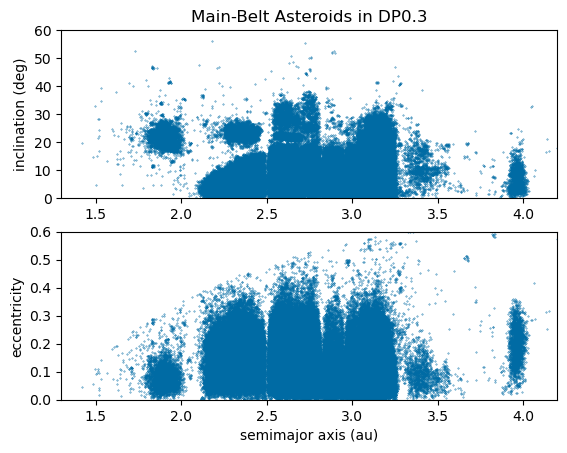

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.set_xlim([1.3,4.2])
ax1.set_ylim([0.,60.])
ax1.scatter(a[outside_NEO_peri], uniqueObj_MBAs[outside_NEO_peri].incl, s=0.1)
ax1.set_ylabel('inclination (deg)')
ax1.set_title('Main-Belt Asteroids in DP0.3')

ax2.set_xlim([1.3,4.2])
ax2.set_ylim([0.,0.6])
ax2.scatter(a[outside_NEO_peri], uniqueObj_MBAs[outside_NEO_peri].e, s=0.1)
ax2.set_xlabel('semimajor axis (au)')
ax2.set_ylabel('eccentricity')

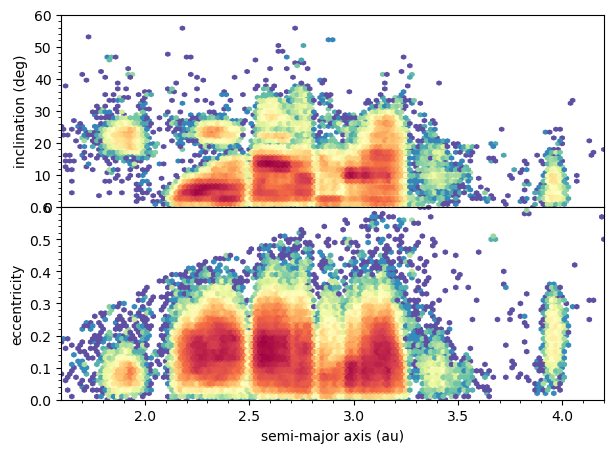

In [32]:
fig, axs = plt.subplots(2, 1, figsize=(7, 5), sharex=True)
fig.subplots_adjust(hspace=0)

axs[0].hexbin(a[outside_NEO_peri], uniqueObj_MBAs[outside_NEO_peri].incl,
              gridsize=(int(4.2/0.02), 50), cmap='Spectral_r', bins='log',
              extent=(0, 4.2, 0, 90))
axs[0].set_ylabel('inclination (deg)')
axs[0].minorticks_on()
axs[0].set_xlim(1.6, 4.2)
axs[0].set_ylim(0.,60.)

axs[1].hexbin(a[outside_NEO_peri], uniqueObj_MBAs[outside_NEO_peri].e,
              gridsize=(int(4.2/0.02), 50), cmap='Spectral_r', bins='log',
              extent=(0, 4.2, 0, 1))
axs[1].set_ylabel('eccentricity')
axs[1].set_xlabel('semi-major axis (au)')

axs[1].set_xlim(1.6, 4.2)
axs[1].set_ylim(0, 0.6)
axs[1].minorticks_on()
plt.show()

In [33]:
def calc_mean_motion_res_a(n_planet_over_n, a_planet):
    """
    Given a mean motion (n) of a small body and 
    the mean motion (n_planet) of a planet,
    calculate the semimajor axis at which the
    given mean-motion resonance occurs.

    Parameters
    ----------
    n: ndarray
        Mean motion of a small body, in deg/d.
    n_planet: ndarray
        Mean motion of a planet, in deg/d.
    a_planet: ndarray
        Semi-major axis of a planet, in au.

    Returns
    -------
    a_res: ndarray
        Semi-major axis of the small body, in au.
        a_res = (n / n_planet)^(2/3) * a_planet
    """

    return (1. / n_planet_over_n)**0.66667 * a_planet

In [34]:
a_res_J_3_1 = calc_mean_motion_res_a((3./1.), 5.2)
a_res_J_5_2 = calc_mean_motion_res_a((5./2.), 5.2)
a_res_J_7_3 = calc_mean_motion_res_a((7./3.), 5.2)
a_res_J_2_1 = calc_mean_motion_res_a((2./1.), 5.2)
a_res_J_4_1 = calc_mean_motion_res_a((4./1), 5.2)
a_res_J_3_2 = calc_mean_motion_res_a((3./2.), 5.2)

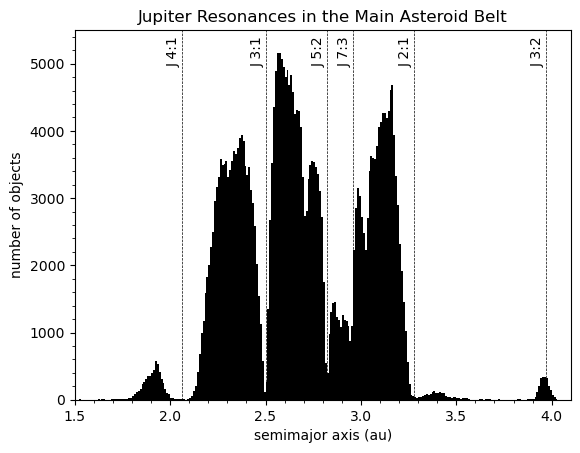

In [35]:
plt.xlim(1.5, 4.1)
plt.ylim(0., 5500.)
plt.hist(a[outside_NEO_peri], bins=np.arange(1.3, 4.2, 0.01), color='Black')
plt.axvline(x=a_res_J_3_1, color='black', linestyle='dashed', linewidth=0.5)
plt.axvline(x=a_res_J_5_2, color='black', linestyle='dashed', linewidth=0.5)
plt.axvline(x=a_res_J_7_3, color='black', linestyle='dashed', linewidth=0.5)
plt.axvline(x=a_res_J_2_1, color='black', linestyle='dashed', linewidth=0.5)
plt.axvline(x=a_res_J_4_1, color='black', linestyle='dashed', linewidth=0.5)
plt.axvline(x=a_res_J_3_2, color='black', linestyle='dashed', linewidth=0.5)
plt.annotate('J 3:1', xy=(a_res_J_3_1-0.08, 5000.), xytext=(a_res_J_3_1-0.08, 5000.), rotation=90.0)
plt.annotate('J 5:2', xy=(a_res_J_5_2-0.08, 5000.), xytext=(a_res_J_5_2-0.08, 5000.), rotation=90.0)
plt.annotate('J 7:3', xy=(a_res_J_7_3-0.08, 5000.), xytext=(a_res_J_7_3-0.08, 5000.), rotation=90.0)
plt.annotate('J 2:1', xy=(a_res_J_2_1-0.08, 5000.), xytext=(a_res_J_2_1-0.08, 5000.), rotation=90.0)
plt.annotate('J 4:1', xy=(a_res_J_4_1-0.08, 5000.), xytext=(a_res_J_4_1-0.08, 5000.), rotation=90.0)
plt.annotate('J 3:2', xy=(a_res_J_3_2-0.08, 5000.), xytext=(a_res_J_3_2-0.08, 5000.), rotation=90.0)
plt.xlabel('semimajor axis (au)')
plt.ylabel('number of objects')
plt.title('Jupiter Resonances in the Main Asteroid Belt')
plt.minorticks_on()
plt.show()

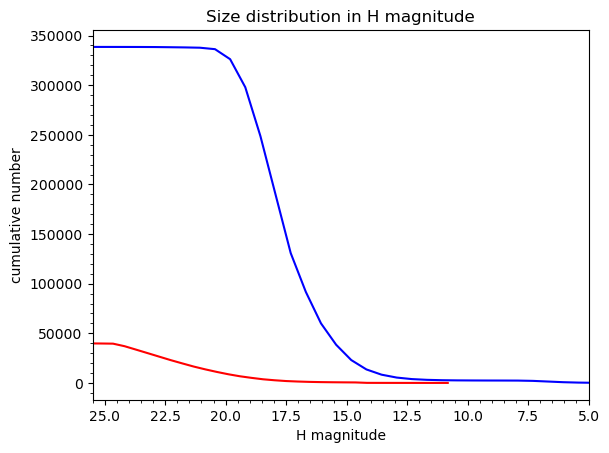

In [36]:
plt.xlim(25.5, 5.)
values, base = np.histogram(uniqueObj_MBAs[outside_NEO_peri].mpcH, bins=40)
cumulative = np.cumsum(values)
plt.plot(base[:-1], cumulative, c='blue')
values, base = np.histogram(uniqueObj.mpcH, bins=40)
cumulative = np.cumsum(values)
plt.plot(base[:-1], cumulative, c='red')
plt.xlabel('H magnitude')
plt.ylabel('cumulative number')
plt.title('Size distribution in H magnitude')
plt.minorticks_on()
plt.show()

### Now let's move to the transneptunian region

Text(0, 0.5, 'eccentricity')

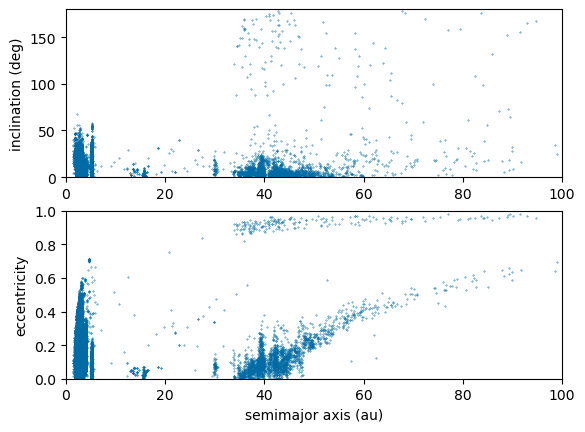

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.set_xlim([0.,100.])
ax1.set_ylim([0.,180.])
ax1.scatter(a[outside_NEO_peri], uniqueObj_MBAs[outside_NEO_peri].incl, s=0.1)
ax1.set_ylabel('inclination (deg)')
#ax1.set_title('Main-Belt Asteroids in DP0.3')

ax2.set_xlim([0.,100.])
ax2.set_ylim([0.,1.0])
ax2.scatter(a[outside_NEO_peri], uniqueObj_MBAs[outside_NEO_peri].e, s=0.1)
ax2.set_xlabel('semimajor axis (au)')
ax2.set_ylabel('eccentricity')